# Simulacion de la valuacion teorica de opciones financieras 

## Modelo Black Scholes: Valor teorico vs Valor de mercado 

In [ ]:
-Christopher Jacob Ahumada Robles 
-Roberto Carlos Guzman Orduño
-Christopher Jacob Ahumada Robles 

### Objetivos

#### Generales
- Conocer la viabilidad de compra de una opción basado en simulación Monte Carlo y modelo Black Scholes.

#### Específicos
- Investigación previa de teoría del modelo de Black Scholes.
- Descargar datos de los activos para analizar rendimiento y volatilidad
- Caracterizar una distribución normal con los rendimientos del activo AMZN del 20 de enero de 2024 al 20 de abril de 2024.
- Simular 10000 escenarios distintos de los rendimientos de AMZN.
- Utilizar las simulaciones para calcular el precio teórico de call o put
- Comparar la valuacion Black Scholes con la valuacion por montecarlo y el valor de mercado de la opcion

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

## Modelo que representa el problema

### Black Scholes

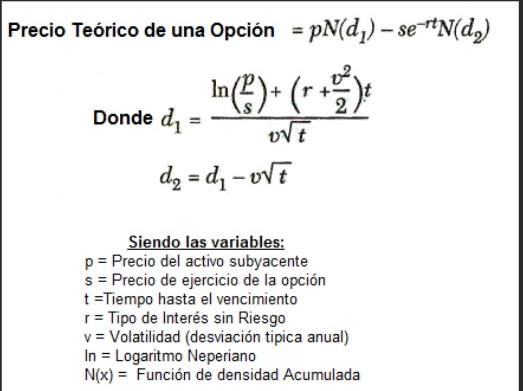

In [13]:
import numpy as np
import scipy.stats as si
import yfinance as yf

def black_scholes(S, K, T, r, sigma, option = 'call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    #d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - (sigma * np.sqrt(T))
    if option == 'call':
        result = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
        
    return result


La fórmula completa es una ecuación diferencial estocástica que describe el movimiento de los precios de los activos en un mercado financiero. Esta fórmula asume que los precios de los activos siguen un movimiento browniano geométrico, que es un modelo de caminata aleatoria donde la cantidad de cambio tiene una distribución normal y la dirección del cambio es independiente del precio pasado.

Las variables d1 y d2 en la fórmula de Black-Scholes son intermediarios en el cálculo del precio de una opción. Aquí está el significado de cada uno:

d1: Esta variable se utiliza para calcular el valor presente esperado de mantener el activo subyacente hasta la expiración de la opción, asumiendo que el precio del activo sigue un movimiento browniano geométrico (un tipo de camino aleatorio). En otras palabras, d1 es esencialmente una medida de cuánto se espera que el activo subyacente se aprecie durante la vida de la opción.

d2: Esta variable se utiliza para calcular el valor presente esperado de pagar el precio de ejercicio en la fecha de vencimiento, de nuevo asumiendo que el precio del activo sigue un movimiento browniano geométrico. d2 es básicamente una medida de cuánto se espera que el activo subyacente se deprecie durante la vida de la opción.

In [15]:
# Ahora analizaremos el activo para obtener la volatilidad, 

### Modelo que se usó en Monte Carlo

In [16]:
# Descargar datos históricos
data = yf.download('AMZN', start='2024-01-01', end='2024-04-20')

# Calcular la volatilidad anualizada (sigma)
returns = data['Adj Close'].pct_change()
volatility = returns.std() * np.sqrt(252)

S = data['Close'][-1]  # precio del activo subyacente
K = 160  # precio de ejercicio
T = 1  # tiempo hasta la madurez en años
r = 0.055  # tasa de interés libre de riesgo

# Calcular el precio de la opción
option_price = black_scholes(S, K, T, r, volatility, option = 'call')
print('El valor teorico de la opción es', option_price)


[*********************100%%**********************]  1 of 1 completed

El valor teorico de la opción es 30.8353503186963


In [17]:
returns.describe()

count    75.000000
mean      0.002164
std       0.016292
min      -0.026268
25%      -0.008522
50%       0.001508
75%       0.009476
max       0.078666
Name: Adj Close, dtype: float64

In [21]:
import numpy as np
import yfinance as yf

def montecarlo(S, K, T, r, sigma, option='call', N=10000):
    # S: precio del activo subyacente
    # K: precio de ejercicio
    # T: tiempo hasta la madurez
    # r: tasa de interés libre de riesgo
    # sigma: volatilidad del activo subyacente
    # N: número de simulaciones

    # Generar N precios futuros aleatorios del activo subyacente 
    ST = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * np.random.normal(0,1, N))
    
    # Calcular el valor de la opción para cada precio futuro
    if option == 'call':
        payoff = np.maximum(ST - K, 0)
    elif option == 'put':
        payoff = np.maximum(K - ST, 0)
    
    # Calcular el valor promedio de la opción y descontarlo al presente
    option_price = np.exp(-r * T) * np.mean(payoff)
    
    return option_price


In [23]:
# Descargar datos históricos
data = yf.download('AMZN', start='2024-01-01', end='2024-04-20')

# Calcular la volatilidad anualizada (sigma)
returns = data['Close'].pct_change()
volatility = returns.std() * np.sqrt(252)

# Definir los parámetros para la opción
S = data['Close'][-1]  # precio del activo subyacente
K = 160  # precio de ejercicio
T = 1  # tiempo hasta la madurez en años
r = 0.055  # tasa de interés libre de riesgo

# Calcular el precio de la opción
option_price = montecarlo(S, K, T, r, volatility, option = 'call')
print('El precio de la opción es', option_price)


[*********************100%%**********************]  1 of 1 completed

El precio de la opción es 30.964115232193013


## Solución del problema de optimización

El modelo de Black Scholes dio un precio de 30.85 y el de Monte Carlo dio un precio de 30.96.

Esto significa que si el valor de mercado es de 32.25 el precio de la opcion esta sobre valorado.

## Visualización de la solución del problema

## Analisis Tecnico
Se confirma una proxima reversion del precio del activo al tener dos gaps por cubrir

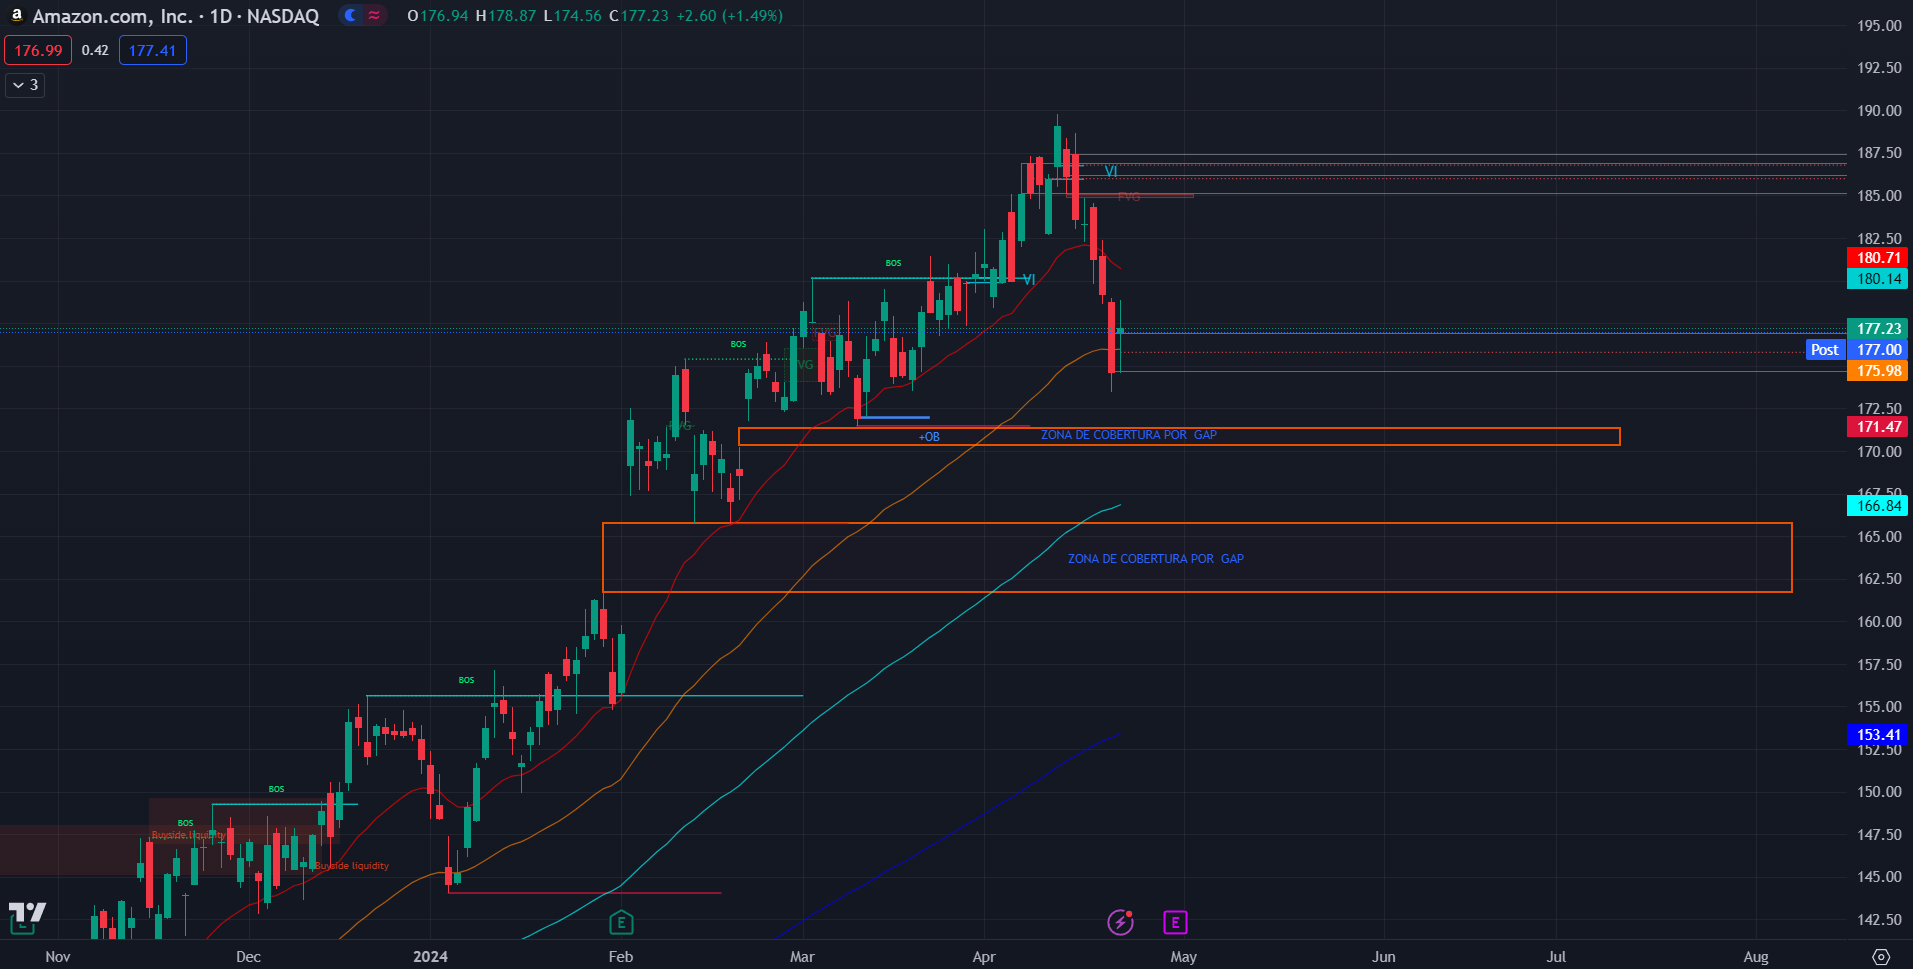

Opcion:


## Conclusiones

¿Se alcanzó el objetivo general? Si

¿Se pudo utilizar la metodología establecida en los objetivos específicos? Si 

¿El resultado fue bueno? Si ¿Por qué? Por que nos dio un panorama de la comparativa entre valor teorico y valor de mercado

¿Cómo se podría mejorar? Calculando la probabilidad de que el activo cubra el precio strike en el periodo de duracion de la opcion

¿Qué aplicaciones podría tener? Coverturas, minimizacion del riesgo, desiciones y estrategias de inversion en mercado de derivados 


## Referencias

https://economipedia.com/definiciones/modelo-black-scholes.html

https://www.investopedia.com/terms/b/blackscholes.asp

https://ocw.mit.edu/courses/mechanical-engineering/2-086-numerical-computation-for-mechanical-engineers-fall-2014/nutshells-guis/MIT2_086F14_Monte_Carlo.pdf
http://ta.twi.tudelft.nl/mf/users/oosterle/oosterlee/lec8-hit-2009.pdf
Sauer, Timothy. Análisis Numérico, 2da. Edición, ISBN: 978-607-32-2059-0.